# Foundations of Statistical Analysis and Machine Learning - Final exam exercise 2/2

### <span style="color:red"> WRITE YOUR NAME HERE: </span>   

In [1]:
print("Deepakraj_DHANARAJ")

Deepakraj_DHANARAJ


### Guidelines

The exam is composed of two exercises (on separate notebooks) each one with a specific dataset. In total, there are three independent parts to complete:
* Exercise 1 (8 points): regression
* Exercise 2 part 1 (9 points): classification
* Exercise 2 part 2 (3 points): clustering

You can work directly on the notebooks. At the end of the 2.5-hour exam, you will have 5 minutes to upload it on Teams.

Don't forget that you have to complete the TWO notebooks to have a passing grade.

Many questions can be tackled even if the previous ones are not completed or not correct.

The exam is long on purpose, so don't worry if you cannot complete 100 % of the questions. Do as much as you can. In case you are blocked at some point, don't panic. Just move on to the next question. And remember written answers where you have to explain or comment your results are worth many points.

Avoid "naive" copy-pasting: you will not understand what you are doing and it will be a problem for the next questions. Notebooks that are cluttered with useless code that has been mindlessly copied will be penalized. Just do what is asked at each question. 

Moreover, you are reminded that any messaging with each other during the exam or use of generative AI models such as ChatGPT, Bard or Bing will be considered as cheating and will result in the termination of your exam. Moreover, similarities between student works are easy to spot. 

If a question seems unclear and you are not sure about what you have to do, do not hesitate to raise your hand and ask for clarification.

Good luck!

## Exercise 2

Here are some libraries that could be usefull in the exercises.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

We will work on the provided data set BankChurners that gathers information on the customers of a bank.

In [3]:
# Loading the original data set
data = pd.read_csv("BankChurners.csv")
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


Here is some code to execute to prepare the data set.

In [4]:
# Removing the last two columns that are useless
data = data.iloc[:,:-2]

# Encoding the customer churn
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

# Encoding the gender
data.Gender = data.Gender.replace({'F':1,'M':0})

# Dropping rows with unknown values
data = data.drop(data[data.Education_Level=='Unknown'].index, axis=0)
data = data.drop(data[data.Income_Category=='Unknown'].index, axis=0)

# Encoding the education level with an (ordered) scale
data.Education_Level = data.Education_Level.replace({'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5})

# Encoding the income category with the mean value of each income interval
data.Income_Category = data.Income_Category.replace({'Less than $40K':20,'$40K - $60K':50,'$60K - $80K':70,'$80K - $120K':100,'$120K +':150})

# Encoding the marital status
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)

# Encoding the card category
data = pd.concat([data,pd.get_dummies(data['Card_Category'], prefix='Card')], axis=1)
# data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
# data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category','CLIENTNUM'],inplace=True)

# Removing the useless columns
data = data.drop(columns = ['Marital_Status','Card_Category','CLIENTNUM'])

data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Card_Blue,Card_Gold,Card_Platinum,Card_Silver
0,0,45,0,3,1,70,39,5,1,3,...,42,1.625,0.061,False,True,False,True,False,False,False
1,0,49,1,5,3,20,44,6,1,2,...,33,3.714,0.105,False,False,True,True,False,False,False
2,0,51,0,3,3,100,36,4,1,0,...,20,2.333,0.000,False,True,False,True,False,False,False
3,0,40,1,4,1,20,34,3,4,1,...,20,2.333,0.760,False,False,False,True,False,False,False
4,0,40,0,3,0,70,21,5,1,0,...,28,2.500,0.000,False,True,False,True,False,False,False
5,0,44,0,2,3,50,36,3,1,2,...,24,0.846,0.311,False,True,False,True,False,False,False
7,0,32,0,0,1,70,27,2,2,2,...,36,0.714,0.048,False,False,False,False,False,False,True
8,0,37,0,3,0,70,36,5,2,0,...,24,1.182,0.113,False,False,True,True,False,False,False
9,0,48,0,2,3,100,36,6,3,3,...,32,0.882,0.144,False,False,True,True,False,False,False
10,0,42,0,5,0,150,31,5,3,2,...,42,0.680,0.217,False,False,False,True,False,False,False


You can assume that the data set is cleaned and prepared now.

## PART 1: Predicting the churn (9 points)

The director of EPIbank has a problem. He is losing a lot of clients who prefer to go open a bank account with the main competitor, BNP Paribank. 

He asks you to develop a model that recognizes clients that are likely to leave EPIbank (i.e. to churn) and go somewhere else. Your model will be used to spot the clients to whom he could offer special benefits to retain them before they leave.

For this task, you have the dataset shown above, with data about past customers, including if they left EPIbank or not.  
**Attrition_Flag** corresponds to the customer churn and is our target variable here. The value is 0 when the customer is still in the bank, and is 1 when she has left the bank and is no longer a customer.  
The other columns will be considered as predictors (or features).

### 1) Prepare y (for the target) and X (for the predictors)

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### 2) Make density plots to compare the distributions of the following three features depending on the Attrition_Flag: Customer_Age, Total_Trans_Ct, Total_Revolving_Bal
In other words:
- On the first plot: show the distribution of Customer_Age with one color for the customers who have left (Attrition_Flag = 1) and another color for the customers who are still in the bank (Attrition_Flag = 0). 
- Plot the same for Total_Trans_Ct and Total_Revolving_Bal 
- (3 plots in total)

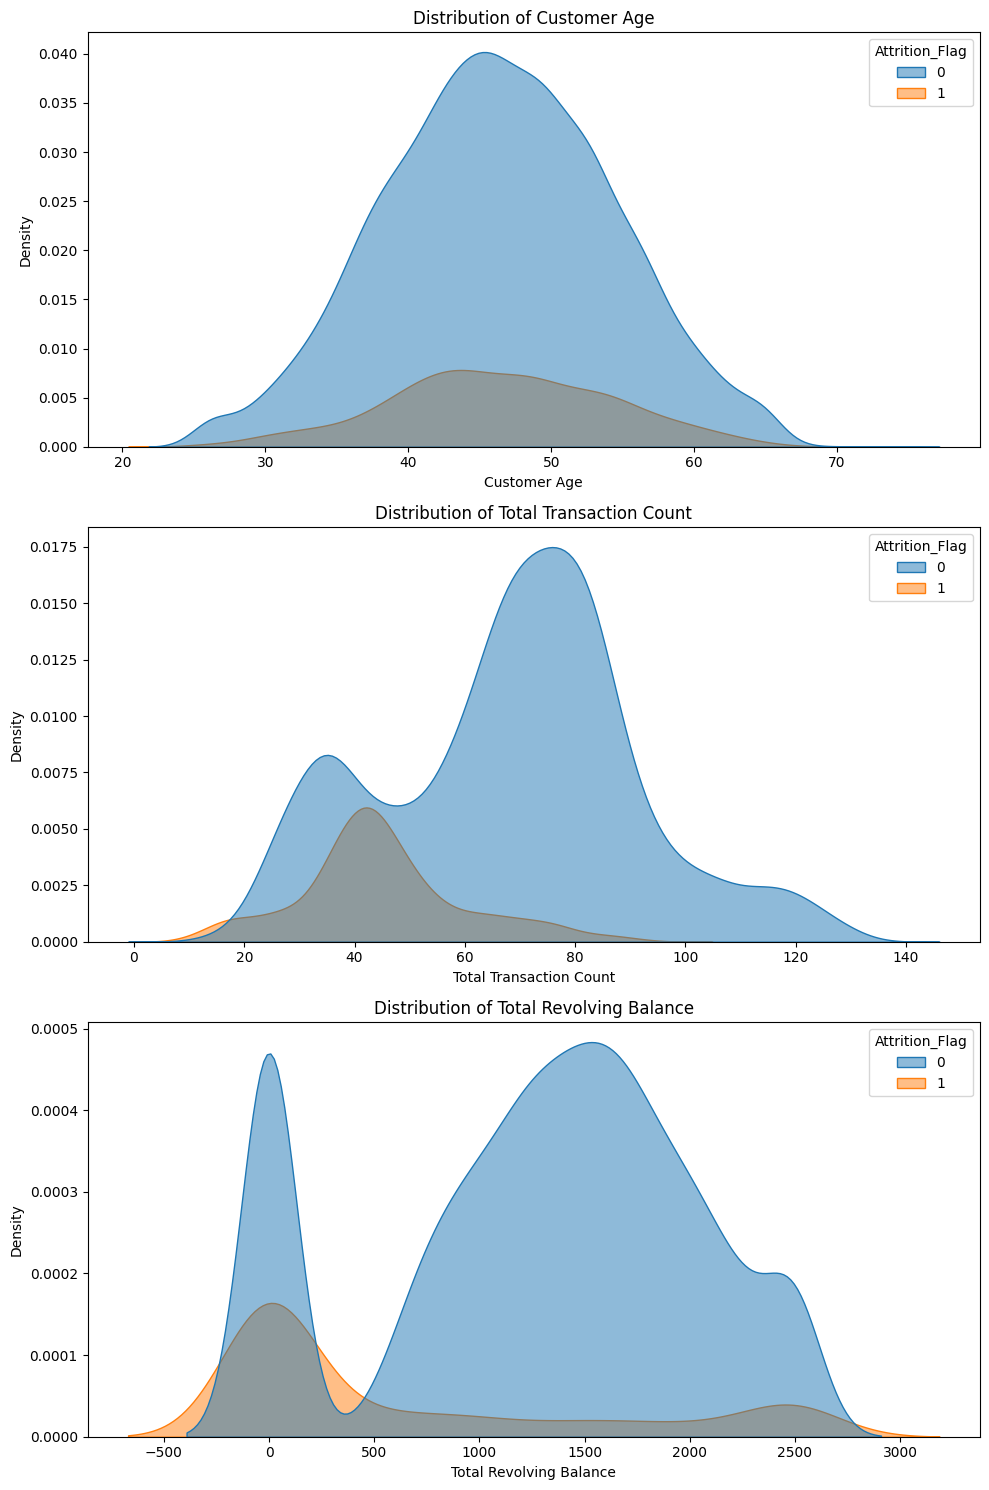

In [6]:
import seaborn as sns

colors = ["#1f77b4", "#ff7f0e"]

# Create subplots for the three density plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Customer age
sns.kdeplot(data=data, x="Customer_Age", hue="Attrition_Flag", palette=colors, fill=True, alpha=0.5, ax=axes[0])
axes[0].set_xlabel("Customer Age")
axes[0].set_ylabel("Density")
axes[0].set_title("Distribution of Customer Age")

#Total_Trans_Ct
sns.kdeplot(data=data, x="Total_Trans_Ct", hue="Attrition_Flag", palette=colors, fill=True, alpha=0.5, ax=axes[1])
axes[1].set_xlabel("Total Transaction Count")
axes[1].set_ylabel("Density")
axes[1].set_title("Distribution of Total Transaction Count")

#Total_Revolving_Bal
sns.kdeplot(data=data, x="Total_Revolving_Bal", hue="Attrition_Flag", palette=colors, fill=True, alpha=0.5, ax=axes[2])
axes[2].set_xlabel("Total Revolving Balance")
axes[2].set_ylabel("Density")
axes[2].set_title("Distribution of Total Revolving Balance")

plt.tight_layout()
plt.show()


### 3) Plot the repartition of Gender (men and women) among customers who have left (Attrition_Flag = 1) and customers who are still in the bank (Attrition_Flag = 0).  

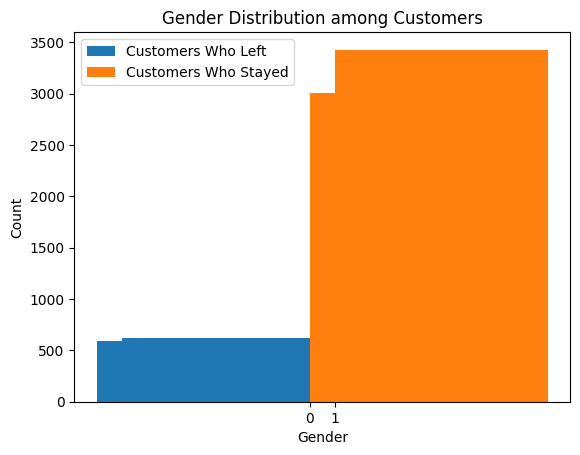

In [7]:
left_customers = data[data['Attrition_Flag'] == 1]
existing_customers = data[data['Attrition_Flag'] == 0]
left_gender_counts = left_customers['Gender'].value_counts()
existing_gender_counts = existing_customers['Gender'].value_counts()
left_gender_counts = left_customers['Gender'].value_counts()
existing_gender_counts = existing_customers['Gender'].value_counts()
left_gender_counts = left_customers['Gender'].value_counts()
existing_gender_counts = existing_customers['Gender'].value_counts()
plt.show()
fig, ax = plt.subplots()
x = left_gender_counts.index

width = 8.5

rects1 = ax.bar(x - width/2, left_gender_counts.values, width, label='Customers Who Left')
rects2 = ax.bar(x + width/2, existing_gender_counts.values, width, label='Customers Who Stayed')



ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution among Customers')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()


plt.show()



# 4) When you look at the figures of questions 2 and 3, which predictor(s) do you think is (are) the best for predicting the churn among the following?: (Explain why)
- Customer_Age 
- Total_Trans_Ct 
- Total_Revolving_Bal
- Gender

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data[['Customer_Age', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Gender']]
y = data['Churn']  # Assuming you have a target column named 'Churn'
X = pd.get_dummies(X)  # Converts categorical variables (e.g., 'Gender') into one-hot encoded columns



KeyError: 'Churn'

### 5) Proceed to a split of the data set. Bear in mind that you will be asked for an accurate estimation of the performance of your best model at the end. Keep 60 % of the examples for the training set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


### 6) Choose ONE metric that you will use to evaluate models that will predict churn. What metric do you use? Explain why you choose this metric, based on the use case.

Mostly commonly used metric to evaluate models for predicting the churn is the F1 score. The F1 score is a harmonic mean of precision and recall, which makes it suitable for imbalanced datasets where the number of churned customers is typically much smaller than the number of non-churned customers. This metric provides a balanced measure of the model's performance in identifying both positive and negative instances.


### 7) Train a model of your choice (except Random Forest), using all features, and tune AT LEAST ONE hyperparameter.
Note: Don't forget to re-train your model with the optimal hyperparameter you found.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred_dtc = dclassifier.predict(X_test)
print(np.concatenate((y_pred_dtc.reshape(len(y_pred_dtc),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False  True]
 ...
 [False  True]
 [False False]
 [False False]]


### 8) Train a Random Forest, using all features, and tune the number of estimators
Note: Don't forget to re-train your RandomForest with the optimal hyperparameter you found.

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
y_pred_rf = rclassifier.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False  True]
 ...
 [False  True]
 [False False]
 [False False]]


### 9) Compare the performance of the models you have trained. Comment the results based on the metric you chose earlier.

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_dtc)
print(cm_rf)
accuracy_score(y_test, y_pred_dtc)
accuracy_score(y_test, y_pred_rf)


accuracy_logreg = accuracy_score(y_test, y_pred_dtc)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


print("Accuracy Decison Tree classfer:", accuracy_logreg)
print("Accuracy Random Forest:", accuracy_rf)



[[2698  189]
 [ 156   14]]
[[2872   15]
 [ 167    3]]
Accuracy Decison Tree classfer: 0.887144259077527
Accuracy Random Forest: 0.9404645076872751


### 10) Plot the ROC curves for your models. Does it confirm your choice? Explain.

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


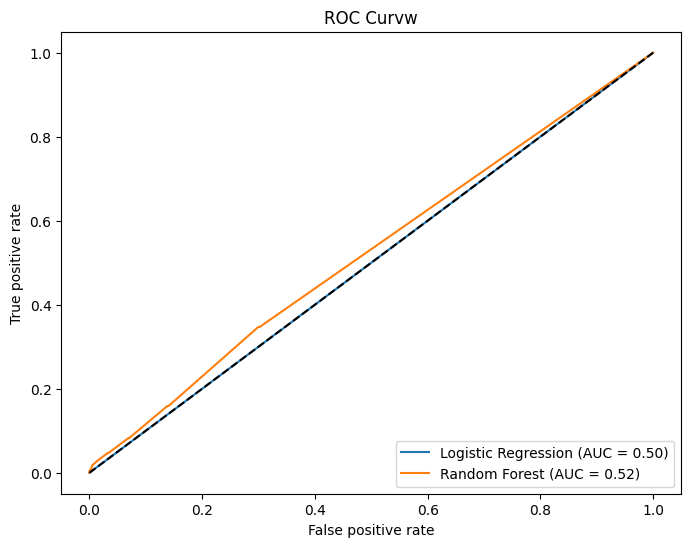

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_dtc = dclassifier.predict_proba(X_test)[:, 1]
y_prob_rf = rclassifier.predict_proba(X_test)[:, 1]

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
auc_dtc = roc_auc_score(y_test, y_prob_dtc)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label='Logistic Regression (AUC = {:.2f})'.format(auc_dtc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random guessing
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curvw')
plt.legend(loc='lower right')
plt.show()

## PART 2: Making clusters of customers (3 points)

In this part, we will not consider the churn, we will on focus on the information in X to create three clusters of customers. Customers among each cluster should share similarities so that specific employees can be attributed to each cluster.

### 11) Train a k-Means clustering with k = 3 using the following features:
- Credit_Limit
- Income_Category

In [20]:
from sklearn.cluster import KMeans

k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


cluster_labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Credit Limit')
plt.ylabel('Income Category')
plt.title('Customer Clusters')
plt.show()


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

### 12) On the feature plane made of _Plot Credit_Limit_ vs. _Income_Category_, plot the customers as points with colors corresponding to the cluster attribution

In [21]:

data = pd.DataFrame({'Credit_Limit': X[:, 0], 'Income_Category': X[:, 1], 'Cluster': cluster_labels})


plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']  
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2'] 

for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Credit_Limit'], cluster_data['Income_Category'], c=colors[cluster], label=labels[cluster])

plt.xlabel('Credit Limit')
plt.ylabel('Income Category')
plt.title('Customer Clusters')
plt.legend()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)

### 13) Describe the clusters that you have formed. In other words, what can you say are the characteristics of customers that belong to each of the clusters (0, 1 and 2)?

Customer belong to the characteristics of  clusters 2